# Cashflow Types
There are three cashflow types in [Monte Carlo Contracts](https://github.com/luphord/monte-carlo-contracts):
- `SimpleCashflows` for external usage where an aggregated, simplified view of the cashflow structure is sufficient
- `SimulatedCashflows` for external usage where a detailed view of the cashflow structure is desired
- `IndexedCashflows` for internal usage within composable contracts

In [1]:
from dataclasses import dataclass
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mcc import (
    One,
    When,
    At,
    Stock,
    Until,
    simulate_equity_black_scholes_model,
)

In [2]:
spot = 50
volatility = 0.2
dategrid = np.array(
    pd.date_range("2023-01-01", "2024-01-01", freq="B").to_numpy(),
    dtype="datetime64[D]",
)
n = 100
rnd = np.random.RandomState(123)

In [3]:
one_touch = Until(At(dategrid[-1]), When(Stock("ABC") > 1.2 * spot, 123 * One("USD")))
one_touch

Until(observable=At(date=numpy.datetime64('2024-01-01')), contract=When(observable=GreaterThan(observable1=Stock(identifier='ABC'), observable2=KonstFloat(constant=60.0)), contract=Scale(observable=KonstFloat(constant=123), contract=One(currency='USD'))))

In [4]:
fix = When(At(dategrid[-1]), 4.5 * One("USD"))
fix

When(observable=At(date=numpy.datetime64('2024-01-01')), contract=Scale(observable=KonstFloat(constant=4.5), contract=One(currency='USD')))

In [5]:
complex_contract = one_touch + fix
complex_contract

And(contract1=Until(observable=At(date=numpy.datetime64('2024-01-01')), contract=When(observable=GreaterThan(observable1=Stock(identifier='ABC'), observable2=KonstFloat(constant=60.0)), contract=Scale(observable=KonstFloat(constant=123), contract=One(currency='USD')))), contract2=When(observable=At(date=numpy.datetime64('2024-01-01')), contract=Scale(observable=KonstFloat(constant=4.5), contract=One(currency='USD'))))

(100, 261)

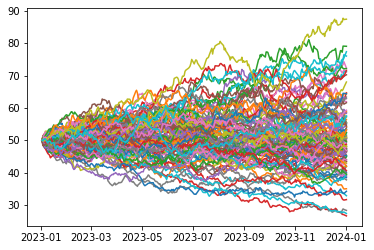

In [6]:
model = simulate_equity_black_scholes_model(
    "ABC", "USD", spot, dategrid, volatility, 0, n, rnd
)
plt.plot(model.dategrid, model.simulated_stocks["ABC"].T)
model.simulated_stocks["ABC"].shape

## SimpleCashflows
Simple data structure to represent simulated cashflows.
Designed for external usage where an aggregated, simplified
view of the cashflow structure is sufficient.
Essentially a mapping from date and currency (row index)
to cashflow value per path (column index).
For convenience, this class is derived from `pandas.DataFrame`
to simplify further processing (such as plotting).
Can be created from `SimulatedCashflows`, but the reverse
direction is not possible.

In [7]:
model.generate_simple_cashflows_in_numeraire_currency(complex_contract)

,,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2023-03-02,USD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-03-10,USD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.0,0.0
2023-03-13,USD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-03-20,USD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-04-04,USD,0.0,0.0,0.0,0.0,0.0,0.0,123.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-04-10,USD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,123.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-04-14,USD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-05-01,USD,0.0,0.0,0.0,123.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-05-02,USD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-05-03,USD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## SimulatedCashflows
Complex data structure to represent simulated cashflows.
Designed for external usage where a detailed view
of the cashflow structure is desired.
Contains full information about the cashflow structure
indexed by datetime64[D] dates. Does not contain the integer
index values that correspond to these dates within the model.
Can be turned into `SimpleCashflows` via `to_simple_cashflows`.
Can be created from `IndexedCashflows`, but the reverse
direction is not possible.

In [8]:
simulated_cashflows = model.generate_cashflows(complex_contract)
simulated_cashflows.dtype

dtype([('date', '<M8[D]'), ('value', '<f8')])

In [9]:
simulated_cashflows.cashflows.shape

(100, 2)

In [10]:
simulated_cashflows.cashflows[:7]

array([[(       'NaT',   0. ), ('2024-01-01',   4.5)],
       [(       'NaT',   0. ), ('2024-01-01',   4.5)],
       [('2023-06-26', 123. ), ('2024-01-01',   4.5)],
       [('2023-05-01', 123. ), ('2024-01-01',   4.5)],
       [(       'NaT',   0. ), ('2024-01-01',   4.5)],
       [(       'NaT',   0. ), ('2024-01-01',   4.5)],
       [('2023-04-04', 123. ), ('2024-01-01',   4.5)]],
      dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [11]:
simulated_cashflows.currencies

array(['USD', 'USD'], dtype='<U3')

In [12]:
# SimulatedCashflows can be turned into SimpleCashflows
simulated_cashflows.to_simple_cashflows()

,,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2023-03-02,USD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-03-10,USD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.0,0.0
2023-03-13,USD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-03-20,USD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-04-04,USD,0.0,0.0,0.0,0.0,0.0,0.0,123.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-04-10,USD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,123.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-04-14,USD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-05-01,USD,0.0,0.0,0.0,123.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-05-02,USD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-05-03,USD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## IndexedCashflows
Complex data structure to represent simulated cashflows.
Designed for external usage where a detailed view
of the cashflow structure is desired.
Contains full information about the cashflow structure
indexed by datetime64[D] dates. Does not contain the integer
index values that correspond to these dates within the model.
Can be turned into `SimpleCashflows` via `to_simple_cashflows`.
Can be created from `IndexedCashflows`, but the reverse
direction is not possible.

In [13]:
indexed_cashflows = complex_contract.generate_cashflows(model.eval_date_index, model)
indexed_cashflows.dtype

dtype([('index', '<i8'), ('value', '<f8')])

In [14]:
indexed_cashflows.cashflows.shape

(100, 2)

In [15]:
indexed_cashflows.cashflows[:5, :]

array([[( -1,   0. ), (260,   4.5)],
       [( -1,   0. ), (260,   4.5)],
       [(125, 123. ), (260,   4.5)],
       [( 85, 123. ), (260,   4.5)],
       [( -1,   0. ), (260,   4.5)]],
      dtype=[('index', '<i8'), ('value', '<f8')])

In [16]:
indexed_cashflows.currencies

array(['USD', 'USD'], dtype='<U3')

In [17]:
indexed_cashflows.dategrid[:5]

array([['2023-01-02'],
       ['2023-01-03'],
       ['2023-01-04'],
       ['2023-01-05'],
       ['2023-01-06']], dtype='datetime64[D]')

In [18]:
# IndexedCashflows can be turned into SimulatedCashflows
indexed_cashflows.apply_index()